In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('农机作业轨迹测算挑战赛公开数据/trainData.csv')
train_label = pd.read_csv('农机作业轨迹测算挑战赛公开数据/trainLabel.csv')

test_data = pd.read_csv('农机作业轨迹测算挑战赛公开数据/testData.csv')
test_submit = pd.read_csv('提交示例.csv')

In [3]:
train_data.mean()

num          601.500000
latitude      29.419376
longitude    106.728831
dtype: float64

In [4]:
train_data

,num,latitude,longitude
0,3,29.419273,106.728780
1,6,29.419276,106.728775
2,9,29.419279,106.728770
3,12,29.419282,106.728763
4,15,29.419285,106.728756
...,...,...,...
395,1188,29.419284,106.728713
396,1191,29.419289,106.728698
397,1194,29.419293,106.728691
398,1197,29.419299,106.728683


In [5]:
train_label

,num,latitude,longitude
0,1,29.419271,106.728785
1,2,29.419272,106.728783
2,4,29.419274,106.728779
3,5,29.419275,106.728777
4,7,29.419277,106.728773
...,...,...,...
795,1193,29.419292,106.728693
796,1195,29.419295,106.728688
797,1196,29.419297,106.728685
798,1198,29.419301,106.728680


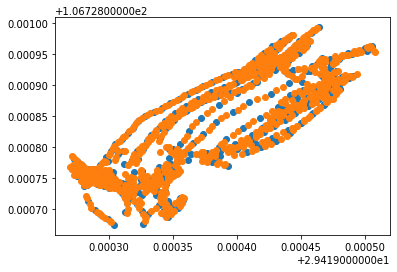

In [6]:
plt.scatter(train_data['latitude'],train_data['longitude'])
plt.scatter(train_label['latitude'],train_label['longitude'])

In [7]:
test_data

,num,latitude,longitude
0,3,29.419354,106.728641
1,6,29.419360,106.728633
2,9,29.419368,106.728628
3,12,29.419376,106.728622
4,15,29.419387,106.728614
...,...,...,...
256,771,29.419577,106.728675
257,774,29.419565,106.728669
258,777,29.419554,106.728662
259,780,29.419551,106.728654


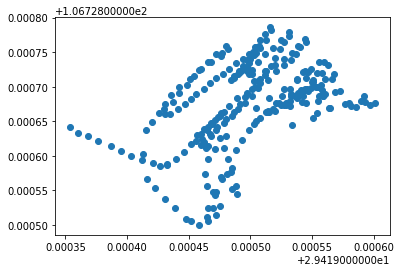

In [8]:
plt.scatter(test_data['latitude'],test_data['longitude'])

In [9]:
test_submit['latitude'] = np.nan
test_submit['longitude'] = np.nan

In [10]:
test_submit = pd.concat([test_submit, test_data], 0).sort_values(by='num')

/tmp/ipykernel_24192/1090000891.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  test_submit = pd.concat([test_submit, test_data], 0).sort_values(by='num')


In [11]:
test_submit['submit'] = test_submit['latitude'].isnull()

In [12]:
test_submit['latitude'] = test_submit['latitude'].fillna(method='ffill').fillna(test_submit['latitude'].dropna().iloc[0])
test_submit['longitude'] = test_submit['longitude'].fillna(method='ffill').fillna(test_submit['longitude'].dropna().iloc[0])

In [13]:
test_submit[test_submit['submit']][['num', 'latitude', 'longitude']].to_csv('submit.csv', index=None)